<span style="color:blue"></span>**Carlo**</span>

here I solve some exercises from the textbook <br>
>_Statistics for Business and Economics, 9th ed.<br>
(Newbold, Carlson, Thorne)<br>
Pearsons Ed._

They may be included as student's exercises in the course notebooks.

<font color='red'>test blue color font</font>


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Testing the mean of a normal distribution

<span style="color:blue">_Example 9.4 page 367_</span>


Grand Junction Vegetables is a producer of a wide variety of frozen vegetables. The company president has asked you to determine if the weekly sales of 16-ounce packages of frozen broccoli has increased. The mean weekly number of sales per store has been 2,400 packages over the past 6 months. You have obtained a random sample of sales data from 134 stores for your study. 

$H_0 : \mu = 2400$ </br>
$H_1 : \mu > 2400$

In [13]:
df = pd.read_excel('../../data/Broccoli.xlsx')

In [14]:
df.head()

,Broccoli,Broccoli Price,Peas,Peas Price
0,890,1.08,9557,0.79
1,17630,0.69,19452,0.68
2,6831,0.59,520,0.79
3,1248,0.70,460,0.79
4,413,0.78,586,0.79


In [15]:
df.shape

(134, 4)

In [90]:
df.Broccoli.mean()

3592.955223880597

In [17]:
stats.ttest_1samp(df.Broccoli, 
                  popmean=2400,
                  alternative='greater')

Ttest_1sampResult(statistic=2.807648686225266, pvalue=0.002871023369494222)

Based on this result, we reject the null hypothesis and conclude that mean sales have increased

# Testing the difference between two population means

<span style="color:blue">_Ex. 10.47 page 416_</span>


You are the product manager for brand 4 in a large
food company. The company president has complained that a competing brand, called **brand 2, has higher average sales**. The data services group has stored the latest product sales (saleb2 and saleb4) and price data (apriceb2 and apriceb4) in a file named Storet described in Chapter 10 appendix.
1. Based on a statistical hypothesis test, does the pres- ident have strong evidence to support her com- plaint? Show all statistical work and reasoning.
2. After analyzing the data, you note that a large outlier of value 971 is contained in the sample for brand 2. Repeat part a with this extreme observa- tion removed. What do you now conclude about the president’s complaint?

In [19]:
df = pd.read_excel('../../data/Storet.xlsx')

In [20]:
cols=['saleb2','saleb4','apriceb2','apriceb4']
# slicing the df selecting only the relevant columns
df = df[cols] 
#df['profit_b2'] = df.saleb2 * df.apriceb2
#df['profit_b4'] = df.saleb4 * df.apriceb4
df['d_sales'] = df.saleb2 - df.saleb4
df.head()

,saleb2,saleb4,apriceb2,apriceb4,d_sales
0,145,146,0.85,0.69,-1
1,126,117,0.85,0.69,9
2,150,239,0.85,0.59,-89
3,297,161,0.67,0.59,136
4,244,110,0.67,0.69,134


In [21]:
df.saleb2.max()

971

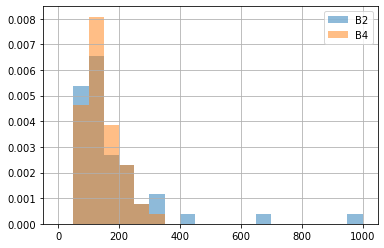

In [22]:
df.saleb2.hist(alpha=.5, density=True, range=(0,1000), bins=20, label='B2')
df.saleb4.hist(alpha=.5, density=True, range=(0,1000), bins=20, label='B4')
plt.legend();

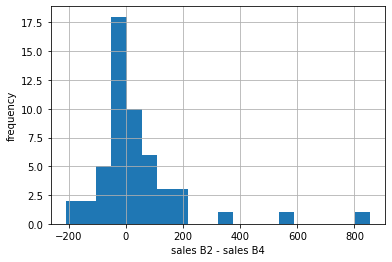

In [23]:
df.d_sales.hist(bins=20)
plt.xlabel('sales B2 - sales B4')
plt.ylabel('frequency')
plt.show()

We carry out a hypotesis test to test for the null hypothesis that two related or repeated samples have identical average (expected) values.

* $H_0$: average sales B2 = average sales of B4
</br>$\ \ \ \ : \mu_2 = \mu_4$ </br>
$\ \ \ \ : \mu_2 -\mu_4 = 0$ 
* $H_1$: average sales B2 > average sales of B4
</br>$\ \ \ \ : \mu_2 > \mu_4$ </br>
$\ \ \ \ : \mu_2 -\mu_4 > 0$

In [24]:
# Calculating the t-test on TWO RELATED samples of scores, a and b.
stats.ttest_rel(
    df.saleb2, 
    df.saleb4, 
    alternative='greater'
)
# alternative='greater': the mean of the distribution underlying the first sample 
# is greater than the mean of the distribution underlying the second sample.

Ttest_relResult(statistic=1.7399195750869862, pvalue=0.04395255945267213)

A $p$-value less than $\alpha$ (=0.05) indicates that we can reject the null hypotesis.

### Let's remove the outlier

In [25]:
df_no_outliers = df[(df.saleb2<800) & (df.saleb4<800)]

In [26]:
stats.ttest_rel(
    df_no_outliers.saleb2, 
    df_no_outliers.saleb4, 
    alternative='greater' )

Ttest_relResult(statistic=1.4170595357244116, pvalue=0.08133335924688273)

There is no sufficient evidence to reject the null hypotesis.

# Testing the difference between proportions

<span style="color:blue">_Example 10.5 page 405_</span>

Northern States Marketing Research has been asked to determine if an advertising campaign for a new cell phone increased customer recognition of the new World A phone. A random sample of 270 residents of a major city were asked if they knew about the World A phone before the advertising campaign. In this survey 50 respondents had heard of World A. After the advertising campaign, a second random sample of 203 residents were asked exactly the same question using the same protocol. In this case 81 respondents had heard of the World A phone. Do these results provide evidence that customer recognition increased after the advertising campaign?

In [68]:
s1 = np.concatenate((np.ones(50), np.zeros(270-50)))
np.random.shuffle(s1)
s2 = np.concatenate((np.ones(81), np.zeros(203-81)))
np.random.shuffle(s1)

In [69]:
s1.mean(), s2.mean()

(0.18518518518518517, 0.39901477832512317)

We are testing the difference between two (large) population proportions.

We consider a standard model with a random sample of $n_x$ observations from a population with a proportion $P_x$ of successes and a second independent random sample of $n_y$ observations from a population with a proportion $P_y$ of successes.

For large samples, proportions can be approximated as normally distributed random variables, and, as a result,

$$ Z =\frac
{
    (\hat p_x - \hat p_y)-(\hat P_x - \hat P_y)
}
{
    \sqrt{ 
        \frac{\hat P_x(1-\hat P_x)}{n_x} + \frac{\hat P_y(1-\hat P_y)}{n_y}
    }
}  $$

or, more simply:
$$ Z =\frac
{
    (\hat p_x - \hat p_y)-(\hat P_x - \hat P_y)
}
{
{\rm standard\ error}
}  $$

has a standard normal distribution.
We want to test the hypothesis that the population proportions $P_x$ and $P_y$ are equal.

$H_0: P_x - P_y = 0$ </br>
$H_1: P_x > P_y$

In [71]:
stats.ttest_ind(s1, s2, axis=0, equal_var=False, alternative='less')

Ttest_indResult(statistic=-5.114320092079818, pvalue=2.516508212631412e-07)

In [80]:
stats.ttest_ind(s1, s2, axis=0, equal_var=False, alternative='less',
               permutations=0)

Ttest_indResult(statistic=-5.114320092079818, pvalue=2.516508212631412e-07)